# Tugas Kelompok - 1
---
## Anggota Kelompok
- Frederick Liko
- Kenzie Pragata
- Aswin Angkasa
- Giovanny Halimko
- Samuel Onasis

## Table of Contents
- [Tugas Kelompok - 1](#tugas-kelompok---1)
    - [Anggota Kelompok](#anggota-kelompok)
    - [Table of Contents](#table-of-contents)
    - [To-Do Task](#to-do-task)
    - [Tahap 1 (Dataset Preparation, and Preprocessing)](#tahap-1-dataset-preparation-and-preprocessing)
        - [Pilih 50 citra dari database - COCO](#pilih-50-citra-dari-database---coco)
        - [Preprocessing pada citra](#preprocessing-pada-citra)
            - [Declare Function](#declare-function)
            - [Display Image](#display-image)
            - [Process Image](#process-image)
    - [Tahap 2 (Image Separation and Feature Detection)](#tahap-2-image-separation-and-feature-detection)
        - [Segmentation](#segmentation)
        - [Feature Detection](#feature-detection)
    - [Tahap 3 (Noise Removal and Quality Enhancement)](#tahap-3-noise-removal-and-quality-enhancement)
        - [Noise Removal](#noise-removal)
        - [Edge Detection](#edge-detection)
    - [Tahap 4 (Object Segmentation Enhancement)](#tahap-4-object-segmentation-enhancement)
        - [Peningkatan Segmentasi](#peningkatan-segmentasi)
        - [Pengolahan Citra](#pengolahan-citra)
    - [Tahap 5 (Feature Detection and Object Matching)](#tahap-5-feature-detection-and-object-matching)

## To-Do Task
> Harap lakukan instalasi `Markdown Checkbox Extension` agar format *checkbox* dapat terlihat.
[Download](https://marketplace.visualstudio.com/items/?itemName=bierner.markdown-checkbox)

**Tahap 1**
- [x] Pilih 50 citra dari database - WikiImg, ImageNet
- [x] Preprocessing pada citra - Normalisasi / Contrast / Sharpening

**Tahap 2**
- [x] Lakukan pemisahan pada citra - Edge Detection, Thresholding, atau Segmentasi
- [x] Lakukan deteksi fitur pada citra - Harris Corner Detection atau SIFT

**Tahap 3**
- [x] Lakukan konvolusi untuk menghilangkan noise - Gaussian Blur, atau Median Filter
- [x] Lakukan peningkatan kualitas citra - Kernel Prewit, Robert, atau Sobel (Minimal 2)

**Tahap 4**
- [x] Tingkatkan segmentasi objek pada citra - Dilasi, Erosi, Opening atau Closing (Minimal 2)
- [x] Olah citra dengan: Hitung lubang, Skeletonisasi, atau Filling Holes

**Tahap 5**
- [ ] Deteksi fitur - SIFT, SURF, atau ORB
- [ ] Lakukan pencocokan objek menggunakan citra satu dengan citra lainnya

## Preparation

### Import Library
Disini adalah beberapa library yang digunakan dalam tugas ini. Library ini digunakan untuk melakukan berbagai operasi pada citra, seperti pembacaan citra, konversi warna, dan pemrosesan citra.

**Lakukan instalasi library yang diperlukan dengan perintah berikut:**

```bash
pip install opencv-python numpy matplotlib scikit-image
```


In [23]:
# System related
import os

# Processing needs
import numpy as np
import cv2

# Image downloading libraries
import torchvision.datasets as dset
from torchvision.transforms import ToTensor

# Image processing libraries
from PIL import Image, ImageEnhance

# Image rendering libraries
import matplotlib.pyplot as plt

# Image converter
from torchvision.transforms.functional import to_pil_image

# Typing annotation
from collections.abc import Callable

### **Quick Setting (OPTIONS PARAMETER)**
Pada bagian ini, kita akan mengatur beberapa parameter yang akan mempermudah kita dalam memproses citra.
- `image_to_load` = Jumlah citra yang akan diload
- `image_to_process` = Jumlah citra yang akan diproses
- `image_size` = Ukuran citra
- `kernel_size` = Ukuran kernel untuk konvolusi

In [42]:
# Maximum of 100 can be loaded at once
image_to_load = 50
image_to_process = 1

image_size = (256, 256)
kernel_size = (5, 5)

### Quick Check Before Running
Untuk memastikan bahwa semua library yang diperlukan telah terinstal dan dapat digunakan, kita akan melakukan beberapa pengecekan awal. Pastikan Anda telah menginstal semua library yang diperlukan sebelum menjalankan kode ini.


In [25]:
assert image_to_load <= 100, "Maximum of 100 images can be loaded at once."

assert image_to_process <= image_to_load, "Image to process must be less than or equal to image to load."

assert image_size[0] == image_size[1], "Image size must be equal"

# Assert librarys are installed
assert dset, "torchvision not installed. Please install torchvision."
assert Image, "PIL not installed. Please install Pillow."
assert plt, "matplotlib not installed. Please install matplotlib."

### Reusable Method Declaration
Pada bagian ini, kita akan mendeklarasikan fungsi yang akan digunakan secara berulang, misalnya:
- Fungsi untuk memproses dataset (Loop)

In [36]:
def display_image(image_path: str, method_name: str) -> None:
    # Load the image using PIL
    image = Image.open(image_path)

    # Display the image using matplotlib
    plt.title(f"Processed Image - {method_name}")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def process_images(method: Callable[[str, str], None], input_dir: str, output_dir: str) -> None:
    for i in range(1, image_to_process + 1):
        image_path = os.path.join(input_dir, f"image_{i}.jpg")
        output_path = os.path.join(output_dir, f"image_{i}.jpg")

        # Process the image
        method(image_path, output_path)

        # Display the processed image
        display_image(output_path, method.__name__)

## Tahap 1 (Dataset Preparation, and Preprocessing)
Pada tahap ini, kita akan melakukan persiapan dataset dan preprocessing pada citra. 

Kita akan menggunakan citra dari dataset yang sudah ada, dan melakukan beberapa operasi preprocessing seperti normalisasi, konversi warna, dan penghapusan noise.

### Pilih 50 citra dari database - COCO
Dibawah ini adalah beberapa citra yang diambil dari database COCO. Citra-citra ini akan digunakan untuk melakukan berbagai operasi pemrosesan citra. Citra-citra ini diambil dari berbagai kategori, seperti hewan, tumbuhan, dan objek lainnya.


In [27]:

# Load the COCO dataset using torchvision
coco_dataset = dset.CocoDetection(
    root='coco/images/val2017',
    annFile='coco/annotations/instances_val2017.json',
    transform=ToTensor()
)


# Save up to 50 images from the COCO dataset
output_dir = "coco_images"
os.makedirs(output_dir, exist_ok=True)
for i, (image, _) in enumerate(coco_dataset):
    if i >= image_to_load:  # Limit to 50 images
        break
    image_path = os.path.join(output_dir, f"image_{i+1}.jpg")
    image_pil = to_pil_image(image)
    image_pil.save(image_path)

print(f"Dataset is saved at {output_dir}")

loading annotations into memory...
Done (t=1.16s)
creating index...
index created!
Dataset is saved at coco_images


### Preprocessing pada citra

- Menggunakan gambar dari dataset COCO untuk operasi peningkatan kontras.
- Peningkatan kontras membantu memperjelas detail pada citra, memudahkan deteksi fitur dan segmentasi.
- Normalisasi dilakukan dengan:
    - Mengubah warna citra menjadi grayscale.
    - Mengubah ukuran citra menjadi 256x256 piksel.
    - Melakukan skalasi dengan rendah (0-255) untuk meningkatkan kontras.
- Ukuran seragam 256x256 piksel mempermudah proses pemrosesan citra selanjutnya.


#### Declare Function
Disini adalah beberapa fungsi yang digunakan untuk melakukan operasi pada citra. Fungsi-fungsi ini digunakan untuk melakukan berbagai operasi seperti pembacaan citra, konversi warna, dan pemrosesan citra.

In [37]:
def resize_image(image: Image.Image) -> Image.Image:
    # Resize the image
    return image.resize(image_size)

def convert_to_grayscale(image: Image.Image) -> Image.Image:
    # Convert to grayscale
    return image.convert("L")

def enhance_contrast(image: Image.Image) -> Image.Image:
    # Enhance contrast
    enhancer = ImageEnhance.Contrast(image)
    return enhancer.enhance(2.0)

def sharpen_image(image: Image.Image) -> Image.Image:
    # Sharpen the image
    enhancer = ImageEnhance.Sharpness(image)
    return enhancer.enhance(2.0)

def normalize_image(image: np.ndarray) -> np.ndarray:
    # Normalize the image to [0, 1]
    normalized = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    # Convert back to uint8 for saving
    return (normalized * 255).astype(np.uint8)

def apply_preprocessing(image_path: str, output_path: str) -> None:
    # Load the image using PIL
    image = Image.open(image_path)

    # Apply preprocessing steps
    image = resize_image(image)
    image = convert_to_grayscale(image)
    image = enhance_contrast(image)
    image = sharpen_image(image)

    # Convert PIL image to OpenCV format for normalization
    image_cv = np.array(image)

    # Normalize the image
    image_cv = normalize_image(image_cv)

    # Convert back to PIL format for saving
    image = Image.fromarray(image_cv)

    # Save the processed image
    image.save(output_path)
    print(f"Preprocessed and saved: {output_path}")


### Process Image
Disini adalah beberapa citra yang telah diproses dengan menggunakan fungsi-fungsi yang telah didefinisikan sebelumnya. Citra-citra ini telah mengalami berbagai operasi pemrosesan citra seperti konversi warna, normalisasi, dan penghapusan noise.

Preprocessed and saved: processed_images\image_1.jpg


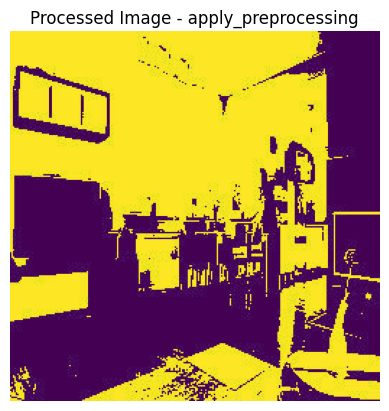

In [38]:
input_dir = 'coco_images'
output_dir = 'processed_images'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

process_images(apply_preprocessing, input_dir, output_dir)

## Tahap 2 (Image Separation and Feature Detection)
Pada tahap ini, kita akan melakukan pemisahan pada citra dan deteksi fitur. 

Kita akan menggunakan salah satu metode untuk melakukan pemisahan citra, seperti:
- **Edge Detection**, metode ini memisahkan tepi-tepi pada citra dengan menggunakan operator Sobel, Prewitt, atau **Canny**.
- **Thresholding**, metode ini memisahkan citra menjadi dua bagian berdasarkan ambang batas tertentu dengan menggunakan metode Otsu atau Adaptive Thresholding.
- **Segmentation**, metode ini memisahkan citra menjadi beberapa bagian berdasarkan warna atau tekstur dengan menggunakan metode Watershed atau K-Means.

Selain itu, kita juga akan melakukan deteksi fitur pada citra dengan menggunakan salah satu metode dibawah ini:
- **Harris Corner Detection**, metode ini mendeteksi sudut-sudut pada citra dengan menggunakan operator Harris.
- **SIFT (Scale-Invariant Feature Transform)**, metode ini mendeteksi fitur-fitur pada citra yang invariant terhadap skala dan rotasi.

### Edge Detection
Pada tahap ini, kita akan melakukan deteksi tepi pada citra menggunakan metode **Canny**. Dengan mendeteksi tepi, kita dapat memisahkan objek dari latar belakang citra. Metode Canny adalah salah satu metode deteksi tepi yang paling umum digunakan dalam pemrosesan citra.

Metode Canny bekerja dengan cara:
1. Menghaluskan citra dengan menggunakan Gaussian Blur untuk mengurangi noise.
2. Menghitung gradien citra untuk mendeteksi tepi.
3. Melakukan non-maximum suppression untuk menghilangkan piksel yang tidak merupakan tepi.
4. Melakukan thresholding untuk menentukan tepi yang kuat dan lemah.
5. Menghubungkan tepi yang kuat dan lemah untuk membentuk garis tepi yang utuh.


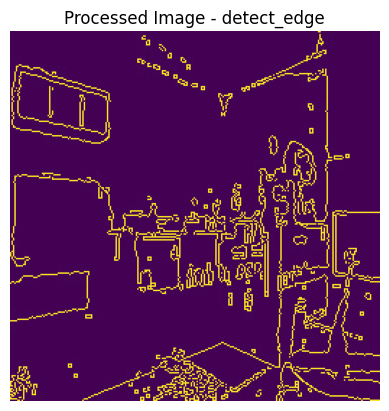

In [39]:
def detect_edge(image_path: str, output_path: str) -> None:
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Canny edge detection
    canny = cv2.Canny(image, 100, 200)

    # Save the detected edge
    cv2.imwrite(output_path, canny)

# Example usage
segmented_dir = 'segmented_images'
os.makedirs(segmented_dir, exist_ok=True)

process_images(detect_edge, output_dir, segmented_dir)


### Feature Detection
Deteksi fitur adalah proses menemukan titik-titik penting dalam citra yang dapat digunakan untuk analisis lebih lanjut.

Pada tahap ini, kita akan menggunakan metode seperti:
- **Harris Corner Detection**: Algoritma untuk mendeteksi sudut dan tepi dalam citra.
- **SIFT (Scale-Invariant Feature Transform)**: Metode untuk mendeteksi dan menggambarkan fitur lokal dalam citra.

Namun, pada tahap ini kita hanya akan menggunakan metode SIFT untuk mendeteksi fitur pada citra. SIFT adalah metode yang kuat dan efisien untuk mendeteksi fitur dalam citra, dan dapat digunakan untuk berbagai aplikasi seperti pencocokan objek dan pengenalan pola.

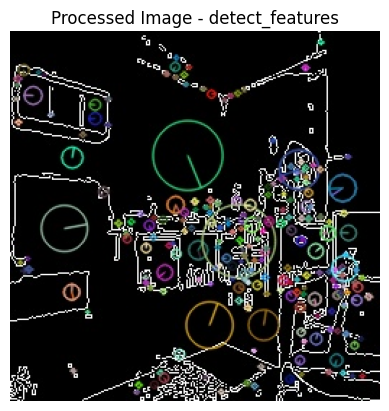

In [40]:
def detect_features(image_path: str, output_path: str) -> None:
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, _ = sift.detectAndCompute(image, None)

    # Draw keypoints on the image
    feature_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Save the feature-detected image
    cv2.imwrite(output_path, feature_image)

# Example usage
feature_dir = 'feature_detected_images'
os.makedirs(feature_dir, exist_ok=True)

process_images(detect_features, segmented_dir, feature_dir)

## Tahap 3 (Noise Removal and Quality Enhancement)
Pada tahap ini, kita akan melakukan penghapusan noise pada citra dan peningkatan kualitas citra. Kita akan menggunakan beberapa metode untuk melakukan penghapusan noise, seperti Gaussian Blur atau Median Filter. Selain itu, kita juga akan melakukan peningkatan kualitas citra menggunakan metode seperti Kernel Prewit, Robert, atau Sobel.

### Noise Removal
Penghapusan noise adalah proses menghilangkan gangguan atau noise yang ada pada citra. Noise dapat mengganggu analisis citra dan mengurangi kualitas citra.

Pada tahap ini, kita akan menggunakan metode seperti:
- **Gaussian Blur**: Metode untuk menghaluskan citra dengan menggunakan filter Gaussian.
- **Median Filter**: Metode untuk menghilangkan noise dengan mengganti nilai piksel dengan nilai median dari sekitarnya.
- **Bilateral Filter**: Metode untuk menghaluskan citra sambil mempertahankan tepi objek.

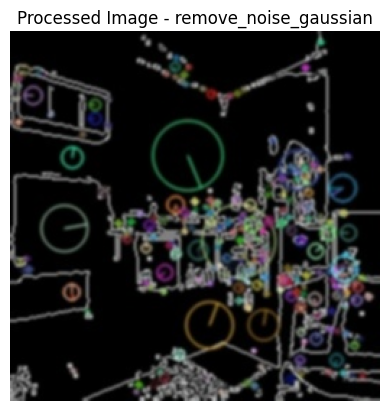

In [44]:
def remove_noise_gaussian(image_path: str, output_path: str) -> None:
    #Load the image using OpenCV
     image = cv2.imread(image_path)

     #Apply Gaussian Blur
     denoised_image = cv2.GaussianBlur(image, kernel_size, 0)

     # Save the denoised image
     cv2.imwrite(output_path, denoised_image)


# Example usage
denoised_dir = 'denoised_images'
os.makedirs(denoised_dir, exist_ok=True)

process_images(remove_noise_gaussian, feature_dir, denoised_dir)

### Quality Enhancement
Peningkatan kualitas citra adalah proses meningkatkan kualitas citra agar lebih jelas dan tajam. Kita akan menggunakan beberapa metode untuk melakukan peningkatan kualitas citra, seperti:
- **Kernel Prewit**: Metode untuk mendeteksi tepi dengan menggunakan kernel Prewit.
- **Robert**: Metode untuk mendeteksi tepi dengan menggunakan operator Robert.
- **Sobel**: Metode untuk mendeteksi tepi dengan menggunakan operator Sobel.

#### Prewitt
Prewitt adalah operator deteksi tepi yang menggunakan dua kernel untuk menghitung gradien citra. Kernel Prewitt digunakan untuk mendeteksi tepi horizontal dan vertikal dalam citra.

**Kernel Prewitt Horizontal**
```
[-1 0 1]
[-1 0 1]
[-1 0 1]
```

**Kernel Prewitt Vertikal**
```
[-1 -1 -1]
[ 0  0  0]
[ 1  1  1]
```

Kernel Prewitt digunakan untuk menghitung gradien citra dalam arah horizontal dan vertikal. Gradien ini kemudian digunakan untuk mendeteksi tepi dalam citra.


#### Robert
Robert adalah operator deteksi tepi yang menggunakan dua kernel untuk menghitung gradien citra. Kernel Robert digunakan untuk mendeteksi tepi diagonal dalam citra.

**Kernel Robert Horizontal**
```
[ 1 0]
[ 0 -1]
```

**Kernel Robert Vertikal**
```
[ 0 1]
[-1 0]
```

Kernel Robert digunakan untuk menghitung gradien citra dalam arah diagonal. Gradien ini kemudian digunakan untuk mendeteksi tepi dalam citra.


#### Sobel
Sobel adalah operator deteksi tepi yang menggunakan dua kernel untuk menghitung gradien citra. Kernel Sobel digunakan untuk mendeteksi tepi horizontal dan vertikal dalam citra.

**Kernel Sobel Horizontal**
```
[-1 0 1]
[-2 0 2]
[-1 0 1]
```

**Kernel Sobel Vertikal**
```
[-1 -2 -1]
[ 0  0  0]
[ 1  2  1]
```

Kernel Sobel digunakan untuk menghitung gradien citra dalam arah horizontal dan vertikal. Gradien ini kemudian digunakan untuk mendeteksi tepi dalam citra.

### Declare Function
Disini adalah beberapa fungsi yang digunakan untuk melakukan operasi pada citra. Fungsi-fungsi ini digunakan untuk melakukan berbagai operasi seperti pembacaan citra, konversi warna, dan pemrosesan citra.

In [45]:
def apply_prewitt(image_path: str, output_path: str) -> None:
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Define Prewitt kernels
    kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

    # Apply the kernels
    prewitt_x = cv2.filter2D(image, -1, kernel_x)
    prewitt_y = cv2.filter2D(image, -1, kernel_y)

    # Combine the results
    prewitt_combined = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)

    # Save the result
    cv2.imwrite(output_path, prewitt_combined)

def apply_roberts(image_path: str, output_path: str) -> None:
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Define Roberts kernels
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])

    # Apply the kernels
    roberts_x = cv2.filter2D(image, -1, kernel_x)
    roberts_y = cv2.filter2D(image, -1, kernel_y)

    # Combine the results
    roberts_combined = cv2.addWeighted(roberts_x, 0.5, roberts_y, 0.5, 0)

    # Save the result
    cv2.imwrite(output_path, roberts_combined)

def apply_sobel(image_path: str, output_path: str) -> None:
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Sobel operator
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

    # Combine the results
    sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

    # Save the result
    cv2.imwrite(output_path, sobel_combined)

### Enhance Image
Metode yang digunakan untuk meningkatkan kualitas citra adalah dengan menggunakan filter Prewitt, Robert, dan Sobel. Filter ini digunakan untuk mendeteksi tepi dalam citra dan meningkatkan kontras citra.


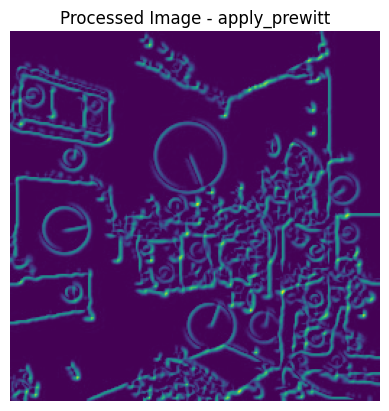

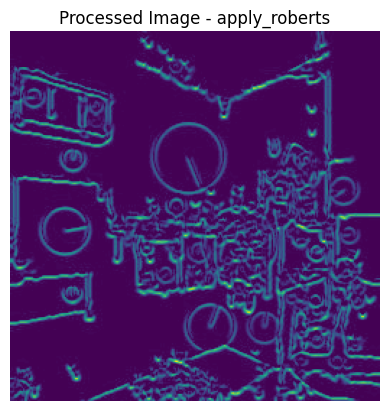

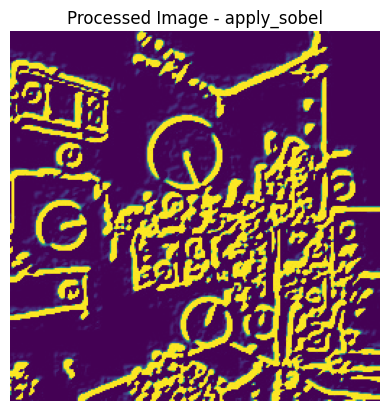

In [ ]:
prewitt_dir = 'prewitt_images'
roberts_dir = 'roberts_images'
sobel_dir = 'sobel_images'


os.makedirs(prewitt_dir, exist_ok=True)
os.makedirs(roberts_dir, exist_ok=True)
os.makedirs(sobel_dir, exist_ok=True)

# Apply Prewitt, Roberts, and Sobel edge detection
process_images(apply_prewitt, denoised_dir, prewitt_dir)

process_images(apply_roberts, denoised_dir, roberts_dir)

process_images(apply_sobel, denoised_dir, sobel_dir)



## Tahap 4 (Peningkatan Segmentasi dan Pengolahan Citra)
Pada tahap ini, kita akan melakukan peningkatan segmentasi objek pada citra dan pengolahan citra lebih lanjut. Kita akan menggunakan beberapa metode untuk melakukan peningkatan segmentasi, seperti dilasi, erosi, opening, atau closing. Selain itu, kita juga akan melakukan pengolahan citra seperti menghitung lubang, skeletonisasi, atau filling holes.


### Peningkatan Segmentasi
Dengan memanfaatkan ****dilasi, dan erosi****, kita dapat meningkatkan segmentasi objek pada citra. Metode ini membantu dalam memperbaiki batas objek dan menghilangkan noise yang tersisa setelah tahap sebelumnya.



In [49]:
def dilate_image(image: Image.Image) -> None:
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.dilate(image, kernel, iterations=1)

def erode_image(image: Image.Image) -> None:
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.erode(image, kernel, iterations=1)

def apply_morphology(image_path: str, output_path: str) -> None:
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply dilation and erosion
    dilated_image = dilate_image(image)
    eroded_image = erode_image(dilated_image)

    # Save the result
    cv2.imwrite(output_path, eroded_image)

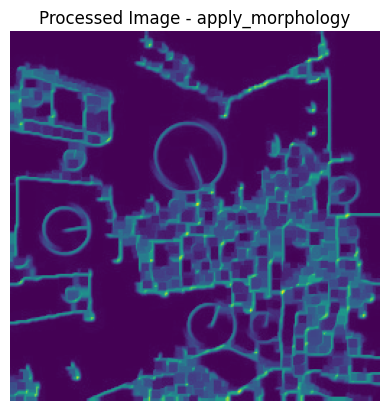

In [50]:
# Create output directory for morphological results if it doesn't exist
output_directory = 'morphological_results'
os.makedirs(output_directory, exist_ok=True)

directory_choices = [prewitt_dir, roberts_dir, sobel_dir]

choosen_dir = directory_choices[0]  # Choose one of the directories for processing

# Process images in the chosen directory
process_images(apply_morphology, choosen_dir, output_directory)

### Pengolahan Citra
Memanfaatkan metode **filling holes** dan **skeletonization**, kita dapat melakukan pengolahan citra lebih lanjut. Metode ini membantu dalam memperbaiki struktur objek dan menghilangkan noise yang tersisa setelah tahap sebelumnya.

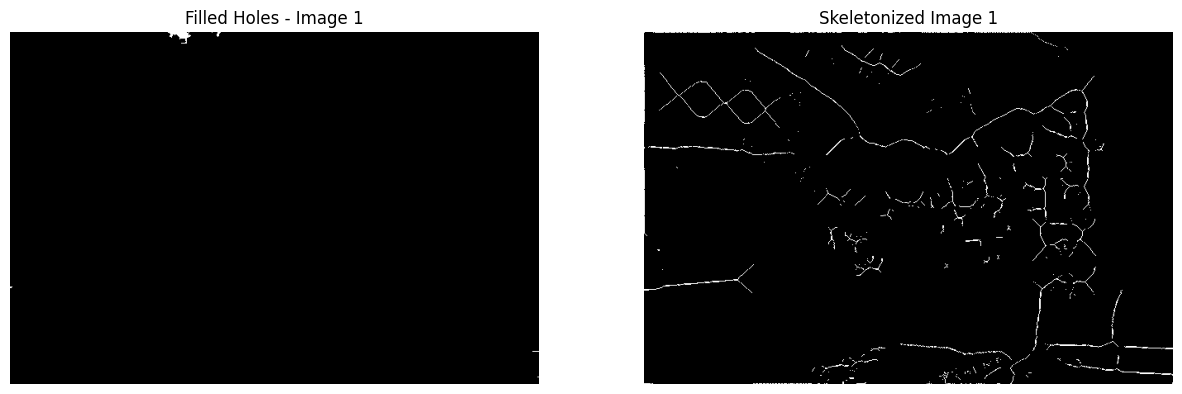

Filled image saved: morphological_results\filled_image_1.jpg
Skeletonized image saved: morphological_results\skeleton_image_1.jpg


In [ ]:
# Perform Filling Holes
def fill_holes(image):
    # Invert the image
    inverted_image = cv2.bitwise_not(image)

    # Find contours
    contours, _ = cv2.findContours(inverted_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    # Fill the holes
    for contour in contours:
        cv2.drawContours(inverted_image, [contour], 0, 255, -1)

    # Invert back to original
    filled_image = cv2.bitwise_not(inverted_image)
    return filled_image

# Perform Skeletonization
def skeletonize_image(image):
    # Convert to binary
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Perform skeletonization
    skeleton = np.zeros_like(binary_image)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    while True:
        eroded = cv2.erode(binary_image, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(binary_image, temp)
        skeleton = cv2.bitwise_or(skeleton, temp)
        binary_image = eroded.copy()
        if cv2.countNonZero(binary_image) == 0:
            break
    return skeleton

# Apply Filling Holes and Skeletonization for multiple images
for i in range(1, image_to_process + 1):
    input_path = os.path.join(denoised_dir, f"denoised_image_{i}.jpg")
    eroded_path = os.path.join(output_directory, "eroded_image.jpg")
    eroded_image = cv2.imread(eroded_path, cv2.IMREAD_GRAYSCALE)

    # Apply Filling Holes and Skeletonization
    filled_image = fill_holes(eroded_image)
    skeleton_image = skeletonize_image(eroded_image)

    # Display the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(filled_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Filled Holes - Image {i}')

    plt.subplot(1, 2, 2)
    plt.imshow(skeleton_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Skeletonized Image {i}')

    plt.show()

    # Save the results
    filled_output_path = os.path.join(output_directory, f"filled_image_{i}.jpg")
    skeleton_output_path = os.path.join(output_directory, f"skeleton_image_{i}.jpg")

    cv2.imwrite(filled_output_path, filled_image)
    cv2.imwrite(skeleton_output_path, skeleton_image)

    print(f"Filled image saved: {filled_output_path}")
    print(f"Skeletonized image saved: {skeleton_output_path}")

## Tahap 5 (Feature Detection and Object Matching)
Pada tahap ini, kita akan melakukan deteksi fitur pada citra dan pencocokan objek menggunakan citra satu dengan citra lainnya. Kita akan menggunakan metode seperti SIFT, SURF, atau ORB untuk mendeteksi fitur pada citra. Selain itu, kita juga akan melakukan pencocokan objek menggunakan metode yang sesuai.

### Feature Detection
Deteksi fitur adalah proses menemukan titik-titik penting dalam citra yang dapat digunakan untuk analisis lebih lanjut. Pada tahap ini, kita akan menggunakan metode seperti SIFT, SURF, atau ORB untuk mendeteksi fitur pada citra. Metode ini membantu dalam menemukan pola dan struktur penting dalam citra.

- **SIFT (Scale-Invariant Feature Transform)** adalah metode yang kuat dan efisien untuk mendeteksi fitur dalam citra, dan dapat digunakan untuk berbagai aplikasi seperti pencocokan objek dan pengenalan pola.
- **SURF (Speeded-Up Robust Features)** adalah metode yang lebih cepat dibandingkan SIFT, tetapi tetap efektif dalam mendeteksi fitur dalam citra.
- **ORB (Oriented FAST and Rotated BRIEF)** adalah metode yang lebih cepat dan efisien dibandingkan SIFT dan SURF, tetapi tetap efektif dalam mendeteksi fitur dalam citra.

In [ ]:
def detect_features_with_sift(image_path, output_dir):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, _ = sift.detectAndCompute(image, None)

    # Draw keypoints on the image
    feature_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Save the feature-detected image
    output_path = os.path.join(output_dir, f"SIFT_feature_image_{i}.jpg")
    cv2.imwrite(output_path, feature_image)
    print(f"SIFT feature-detected image saved: {output_path}")

    # Display the feature-detected image
    plt.imshow(cv2.cvtColor(feature_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"SIFT Feature Detection - Image {i}")
    plt.show()


# Directory to save feature-detected images
feature_methods_dir = 'feature_methods_images'
os.makedirs(feature_methods_dir, exist_ok=True)

# Loop through the number of images to process
for i in range(1, image_to_process + 1):
    input_path = os.path.join(denoised_dir, f"denoised_image_{i}.jpg")
    detect_features_with_sift(input_path, feature_methods_dir)


### Object Matching
Pencocokan objek adalah proses mencocokkan fitur yang terdeteksi pada citra satu dengan fitur pada citra lainnya. Pada tahap ini, kita akan menggunakan metode yang sesuai untuk melakukan pencocokan objek. Metode ini membantu dalam menemukan kesamaan antara dua citra dan dapat digunakan untuk berbagai aplikasi seperti pengenalan objek dan pelacakan.